<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Final_Air_quality_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigation into the Air Quality of Kent Roads in England 2020 & 2021**
---








## Introduction

### Why do we record Nitrogen Dioxide (NO2) levels?

"Environmental and health effects of nitrogen oxides:

Elevated levels of nitrogen dioxide can cause damage to the human respiratory tract and increase a person's vulnerability to, and the severity of, respiratory infections and asthma.

Long-term exposure to high levels of nitrogen dioxide can cause chronic lung disease.

It may also affect the senses, for example, by reducing a person's ability to smell an odour.

High levels of nitrogen dioxide are also harmful to vegetation—damaging foliage, decreasing growth or reducing crop yields." [Environmental and health effects of nitrogen oxides](https://www.qld.gov.au/environment/pollution/monitoring/air/air-pollution/pollutants/nitrogen-oxides)

Given the negative effects of NO2 on the environment and public health the UK Government set new air quality standards in 2010. 

"The Air Quality Standards Regulations 2010 require that the annual mean concentration of NO2 must not exceed **40 µg/m3** and that there should be no more than 18 exceedances of the hourly mean limit value (concentrations **above 200 µg/m3**) in a single year." 

The figure below shows the levels in NO2 since 1990 (Sourced from National statistics
Concentrations of nitrogen dioxide  [National statistics
Concentrations of nitrogen dioxide ](https://www.gov.uk/government/statistics/air-quality-statistics/ntrogen-dioxide))


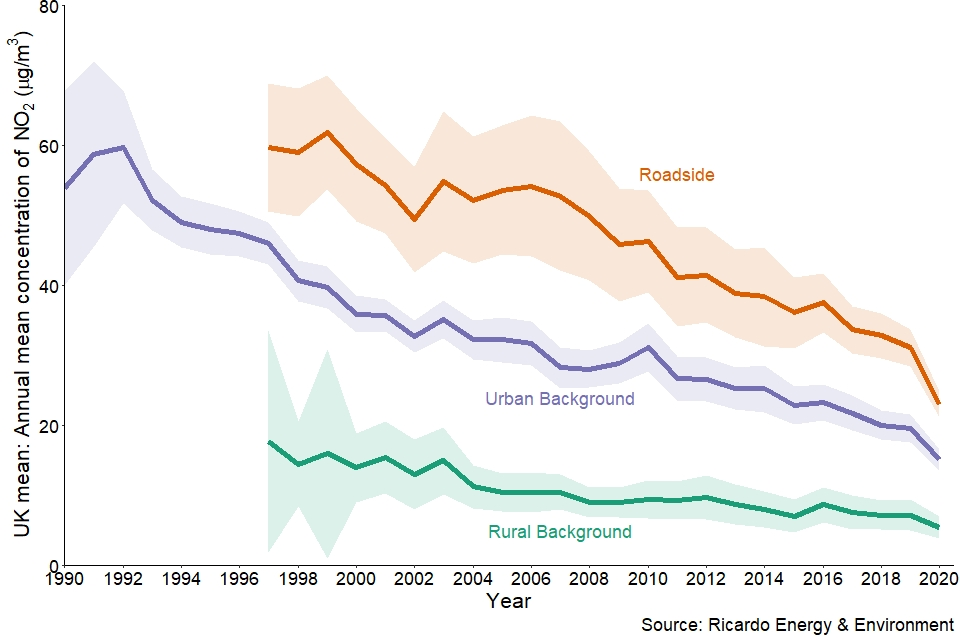

As can be seen, the levels of Nitrogen Dioxide (NO2) have decreased rapidly over the past decade since the regulations were put in place. However, with the increased number of vehicles on our roads causing worsening traffic jams, the levels of NO2 could creep up to dangerous levels in urban areas. Hence, affecting the health of residents and workers on those streets.

### Project aims:  to clean and wrangle the air quality data from Kent, England and provide visualisations to show Nitrogen Dioxide levels recorded and possible trends in road use.

The following data file contains data collected at a roadside monitoring station.  You can see the data for year 2020 in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

*(Source of the data used here from [Reporting Air Quality in Kent and Medway](https://kentair.org.uk/).)*

The data contains:
* a heading line (Chatham Roadside)
* dates and times of the readings 
* Nitrogen Dioxide NO2 levels (sometimes contain nodata)
* Status - which is always the same (V µg/m³, the units of measure).

### Tasks undertaken to clean, sort and wrangle the data

1. Read the dataset into a dataframe, skipping the first row   
2. Convert dates and times to usable date/time format.  
3. Remove rows with nodata in the Nitrogen dioxide column.  
4. Convert the Nitrogen dioxide levels values to float type.  
5. Sort by Nitrogen dioxide level.  
6. Create two new columns for 'Weekdays' from the date column.  
7. Rename the column Nitrogen dioxide level to 'NO2 Level (V ug/m3)'.  
8. Remove the Status column.  

In [ ]:
import pandas as pd

def get_data(url):
  #To read in data for 2021 air quality of Chatham Roadside
  df = pd.read_csv(url,skiprows=[0], encoding = 'unicode_escape') 
  #Kept getting error message about unicodedecodeerror-utf8 so Stack Overflow advice was to add encoding parameter to read.csv.
  #Remove 'nodata' rows from Nitrogen Dioxide column
  for i in df.index:
    if df.loc[i, "Nitrogen dioxide"] == "nodata":
      df.drop(i, inplace = True) 
  return df

url = "https://raw.githubusercontent.com/bjentwistle/PythonFundamentals/main/Datasets/NO2-measured-data-2020-2021-Chatham-Roadside%20-%20NO2-measurement-data-2020-2021-test2.csv"
air_quality_2020 = get_data(url)

air_quality_2020.dtypes #check the data types in the dataframe

Date                object
Time                object
Nitrogen dioxide    object
Status              object
dtype: object

In [ ]:
#Check the output is what was expected. Date, Time and Nitrogen Dioxide level as a number, although all object types.
air_quality_2020.head() 

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,01:00:00,41.07113,V µg/m³
1,01/01/2020,02:00:00,38.9604,V µg/m³
2,01/01/2020,03:00:00,35.12313,V µg/m³
3,01/01/2020,04:00:00,35.85312,V µg/m³
4,01/01/2020,05:00:00,32.10503,V µg/m³


In [ ]:
def clean_df(df):
  #To convert all dates to Datetime format
  df['Date'] = pd.to_datetime(df['Date'])
  #To convert "Time" column to actual time format
  df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.time

  #To convert Nitrogen dioxide column to float type
  df['Nitrogen dioxide'] = pd.Float64Index(df['Nitrogen dioxide'])

  #To sort by Nitrogen dioxide
  df = df.sort_values("Nitrogen dioxide")

  #To add new column called 'weekdays'
  df["Weekdays_num"] = df['Date'].dt.weekday #will need this later for pivot table indexing
  df["Weekdays"] = df['Date'].dt.strftime("%a")
  df["Week_num"] = df['Date'].dt.strftime("%W")
  df["Year"] = df['Date'].dt.strftime("%Y")

  #To rename Nitrogen dioxide column to "NO2 Level (V ug/m3)"
  df.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m3)"}, inplace =True)

  #To drop the Status column
  df = df.drop(["Status"],axis=1)
  return df 

air_quality_clean_2020 = clean_df(air_quality_2020)
air_quality_clean_2020.head()

,Date,Time,NO2 Level (V ug/m3),Weekdays_num,Weekdays,Week_num,Year
8668,2020-12-27,05:00:00,0.42410,6,Sun,51,2020
5712,2020-08-26,01:00:00,0.58689,2,Wed,34,2020
4489,2020-06-07,02:00:00,0.58930,6,Sun,22,2020
5714,2020-08-26,03:00:00,0.59123,2,Wed,34,2020
8669,2020-12-27,06:00:00,0.65300,6,Sun,51,2020


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  


In [ ]:
#Repeat for the next year - read in data for 2021 air quality of Chatham Roadside and clean it.

air_quality_2021 = get_data(url)
url =  "https://raw.githubusercontent.com/bjentwistle/PythonFundamentals/main/Datasets/NO2-measured-data-2021-2022-Chatham-Roadside%20test1.csv"

air_quality_2021 = get_data(url)
air_quality_clean_2021 = clean_df(air_quality_2021) 
#Check to see if the output is what is expected.
air_quality_clean_2021.head()

,Date,Time,NO2 Level (V ug/m3),Weekdays_num,Weekdays,Week_num,Year
7177,2021-10-27,02:00:00,-0.77743,2,Wed,43,2021
7009,2021-10-20,02:00:00,-0.54076,2,Wed,42,2021
7107,2021-10-24,04:00:00,-0.41740,6,Sun,42,2021
6674,2021-06-10,03:00:00,-0.31174,3,Thu,23,2021
7178,2021-10-27,03:00:00,-0.28544,2,Wed,43,2021


No concatenate the two datasets to expand it to 2020 and 2021.  

In [ ]:
import numpy as np

#concatenate the two years of data and sort by date then print as a test
combined_df = pd.concat([air_quality_clean_2020, air_quality_clean_2021], join='inner', ignore_index=True)
combined_df = combined_df.sort_values("Date")

#Calcuate the averages NO2 levels by weekdays (same as pivot below)
# average_NO2 = combined_df.groupby(["Weekdays"])["NO2 Level (V ug/m3)"].mean()
# print(average_NO2)
annual_mean = combined_df.groupby(["Year"])["NO2 Level (V ug/m3)"].mean()
print(annual_mean)
combined_df.describe()

Year
2020    18.543643
2021    18.637369
Name: NO2 Level (V ug/m3), dtype: float64


,NO2 Level (V ug/m3),Weekdays_num
count,17312.000000,17312.000000
mean,18.590636,3.007336
std,12.793750,1.999452
min,-0.777430,0.000000
25%,9.020180,1.000000
50%,15.433880,3.000000
75%,24.919745,5.000000
max,113.061890,6.000000


## Explanation
--------------
The combined dataframe contains 17,312 rows of data after the null values were removed. The maximum NO2 level is 113.06 V ug/m3. This appears to be an anomoly as the 75 percentile value is only 24.92 (V ug/m3). This could be related to the 3rd week in 2020 where the weekly average is above 40 (V ug/m3).

***I am not sure why the minimum value is negative as I assume there can't be a negative amount of NO2 in the atmosphere however, it could be due to an error in the sensors.***

Also the Annual mean value of NO2 levels was well below that stipulated by the government's regulations ("annual mean concentration of NO2 must not exceed 40 µg/m3").

### Further work
Returning to this project after several weeks on the Data Accelerator course, I wanted to add some visualisations and possible predictions to this project.

In [ ]:
#Group by Weekdays and show mean NO2 levels by day of the week (Start of the week is Monday)
air_quality_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m3)", index = ["Weekdays_num"],columns = "Year", aggfunc = np.mean)

print(air_quality_pivot)

Year               2020       2021
Weekdays_num                      
0             18.930287  18.360034
1             18.907164  19.865592
2             20.250290  20.985545
3             20.104272  19.049178
4             18.899742  19.976928
5             16.690111  17.739172
6             16.000079  14.526495


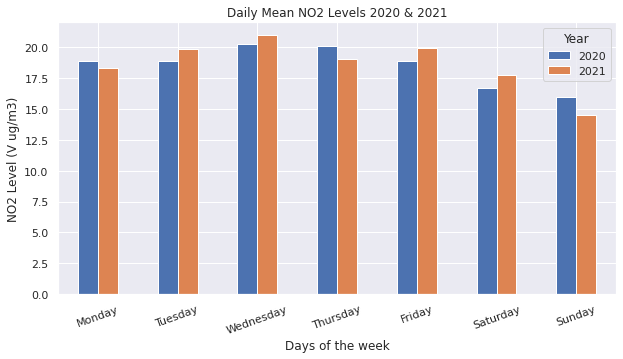

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the daily mean levels of NO2 using the pivot table above.
sns.set(rc = {'figure.figsize':(10,5)})

air_quality_pivot.plot(kind='bar', legend = True)

plt.xticks([0, 1, 2,3,4,5,6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],rotation=20)
plt.ylabel("NO2 Level (V ug/m3)")
plt.xlabel("Days of the week")
plt.title("Daily Mean NO2 Levels 2020 & 2021")
plt.show()

# Findings
This plot of NO2 levels plotted by the day they were recorded shows very clearly that Sunday is when there are the least number of vehicles on the road. Conversely, the busiest days of the week have the highest levels of NO2.

It would be interesting to see what the levels are like at different times of the day too.


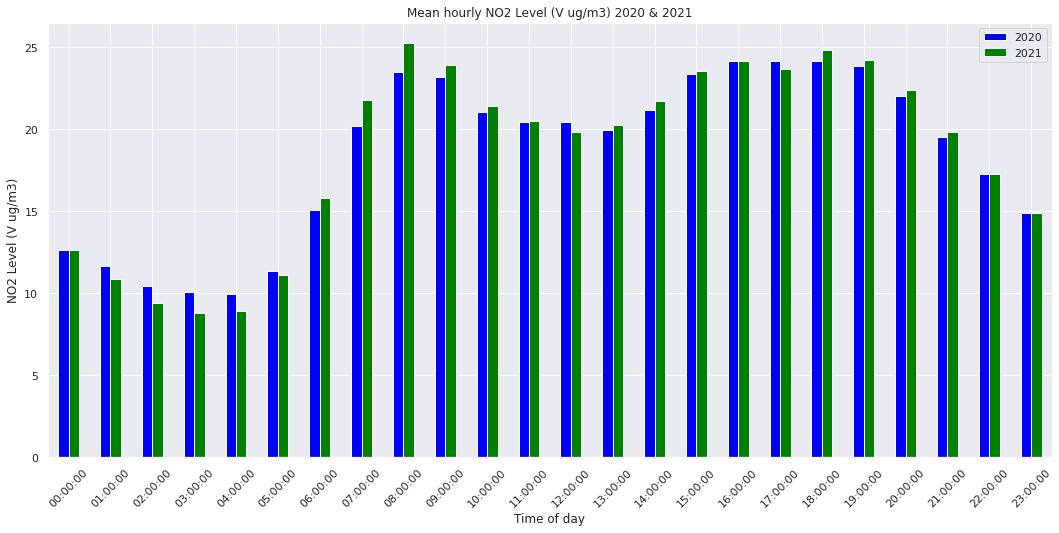

In [ ]:
#Group by time and show summary stats by day of the week
air_quality__time_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m3)", index = ["Time"], columns= "Year", aggfunc = np.mean)

#print(air_quality__time_pivot)
sns.set(rc = {'figure.figsize':(18,8)})
air_quality__time_pivot.plot(kind='bar', color = ("blue", "green")).legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.title("Mean hourly NO2 Level (V ug/m3) 2020 & 2021")
plt.ylabel("NO2 Level (V ug/m3)")
plt.xlabel("Time of day")
plt.show()

# Findings
This plot shows the peak times during the day when the highest levels (above 20 ug/m3) coincide with 'rush hour' times. These times are 7am till 11am then between 2pm and 8pm. However teh levels don't come down significantly during the day until the small hours of the morning.


1.   This plot shows the peak times during the day when the highest levels coincide with 'rush hour' times.
2.   The lowest levels (volume under 10 ug/m3)  are the hours of 2am till 4am. These are generally the quiestest times on the roads. However, the levels never get near to zero in those quiet hours suggesting that the NO2 lingers in the air constantly.
3. It can also be seen that 2021 levels are higher than in some time windows, this is most likely due to the Covid 19 lockdowns reducing traffic during 2020. More years worth of data around the pandemic time would need to be observed to see the impact of the lockdowns on NO2 levels.



### Perhaps looking at the two years side by side will help us to see if the pandemic effected the weekly emmisions at the roadside station.

With that in mind the next thing to do wioudl be to plot the two years grouped by week numbers through each year to see if there is a pattern.

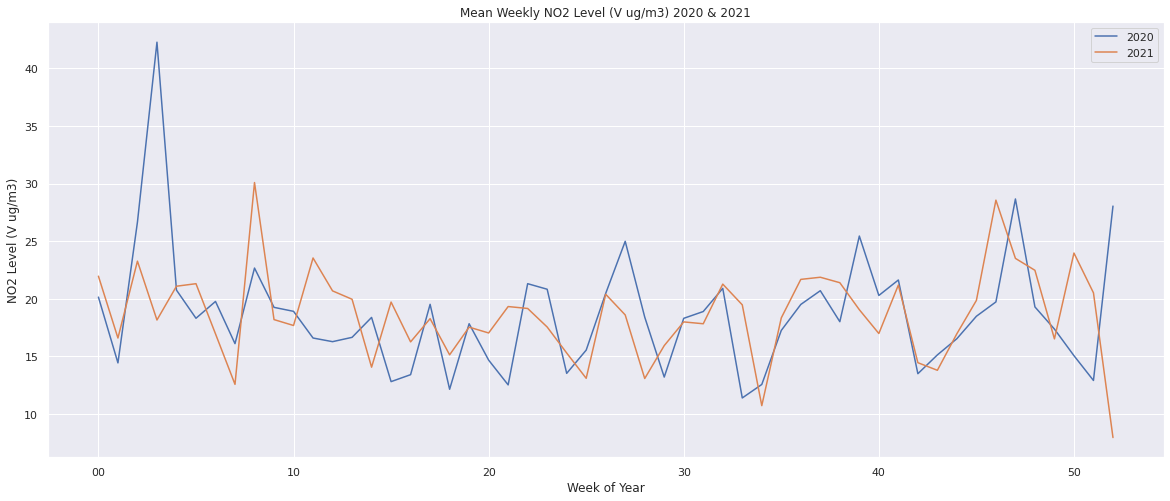

In [ ]:
#Group by Week number in the year  and show mean NO2 levels by week 
air_quality_week_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m3)", index = ["Week_num"], columns= "Year", aggfunc = np.mean)

#Calcuate the averages NO2 levels by weekdays 
sns.set(rc = {'figure.figsize':(20,8)})
air_quality_week_pivot.plot(kind='line').legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.title("Mean Weekly NO2 Level (V ug/m3) 2020 & 2021")
plt.ylabel("NO2 Level (V ug/m3)")
plt.xlabel("Week of Year")
plt.show()


This chart shows the weekly mean values of NO2 levels throughout the years 2020 and 2021. National Lockdown due to Covid-19 began on 23rd March 2020 (week 13).

There doesn't seem to be a drastic reduction in roadside NO2 but the mean values are lower than 2021 for some of the following weeks. 

Also of note is the large spike in week 3 of 2020. This could be due to road works causing more stationary traffic or a fault in the sensor collecting the data. It is hard to know why without more information.

Being curious about other possible outliers, we could create a boxplot of the two years and see if there are other spikes or dips in the data that don't fit. 

Year           2020       2021
Week_num                      
00        20.141477  21.958897
01        14.430650  16.588855
02        26.658647  23.264377
03        42.276634  18.154456
04        20.750457  21.088076


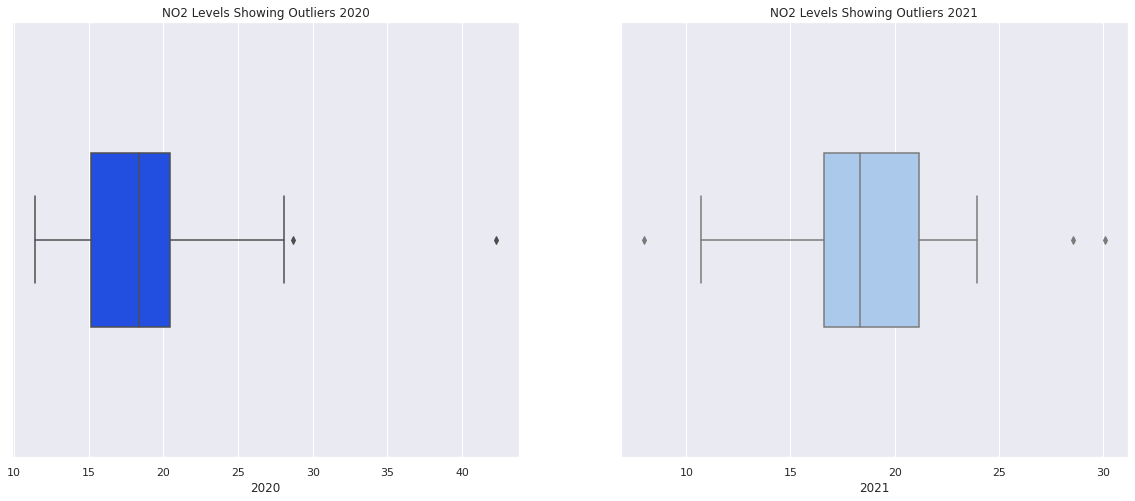

In [ ]:
print(air_quality_week_pivot.head())
#set figure size and subplots for side by side charts

fig, axes = plt.subplots(1,2)
sns.set(rc = {'figure.figsize':(15,5)})

sns.boxplot(x=air_quality_week_pivot["2020"], width = 0.4, palette ="bright", ax=axes[0]).set(title = "NO2 Levels Showing Outliers 2020")
sns.boxplot(x=air_quality_week_pivot["2021"], width = 0.4, palette ="pastel", ax=axes[1]).set(title ="NO2 Levels Showing Outliers 2021");


The two boxplots above indicate that there are a handful of outlier data points over both years. The spike in 2020 is particularly out of sorts with the rest of the data set. 2021 has outliers above and below the normal distribution of data points. Further information would be needed before deciding to remove these datapoints from the dataset. There might be legitimate reasons for these outliers.

# Conclusion:

### Making predictions:
As more restrictions on the types of vehicles alllwed on our roads are made (ie the end of diesel and petrol engines from 2030), the adding of low emission zones in towns and cities and the increase of electric cars driving our streets, I predict that the emmisions recorded by street monitoring stations will continue to decrease. I would need much more data from several years to make any other predictions about the Nitrogen Dioxide levels.


### Helpful references
---
[Ban on petrol and diesel cars in 2030
](https://www.gov.uk/government/news/government-takes-historic-step-towards-net-zero-with-end-of-sale-of-new-petrol-and-diesel-cars-by-2030)

[Low Emission Zones to be introduced in Edinburgh 31st May 2022](https://www.edinburgh.gov.uk/roads-travel-parking/low-emission-zone-scheme/4)




# Reflections:

This project started as a mini hackathon project in the Oython Fundamentals week before the course started hence, the learning curve was immense. I went from doing no coding to being able to read in the file to a dataframe, clean up and wrangle the data into a useful format. Also Produce charts and statistics that allow me to read the data in a more user-friendly way.

Returning to this project after several weeks of learning was an interesting snapshot of how far I had developed. I was reassured that I could learn new tricks.
